# Proje 1: Temel Veri Analizi
Veri Seti: ["Google Play Store Apps"](https://www.kaggle.com/lava18/google-play-store-apps) (Kaggle)<br>
Açıklama: "Web scraped data of 10k Play Store apps for analysing the Android market."

In [25]:
## Google Drive (Colab Notebook)
# from google.colab import drive
# drive.mount('/content/drive/')
## Requested code: 4/0wEb6uaXYhLLiAuTo_WL6jbh5tSPKeeXyGY9IEnyvndpWcToAckFq4c
## Output: Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="whitegrid")
# import warnings; warnings.filterwarnings("ignore")

from scipy.stats.mstats import winsorize
from scipy.stats import jarque_bera, normaltest
from sklearn.preprocessing import normalize, StandardScaler, scale
from sklearn.decomposition import PCA

title_font = {"family":"monospace", "color":"darkred", "size":16, "weight":"heavy"}
axis_font = {"family":"sans", "color":"darkred", "size":12, "weight":"bold"}
    # https://matplotlib.org/3.2.1/tutorials/text/text_props.html


In [27]:
# apps = pd.read_csv("/content/drive/My Drive/MertColab/proje1/apps.csv")    # "google apps" file
apps = pd.read_csv("apps.csv")

In [28]:
# Başlangıçta, ilk csv dosyası olan "Google Apps" ile başlayalım.
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 592.9+ KB


In [29]:
apps.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [30]:
apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
# Scrapping yapılırken duplicate olarak geçen gözlemleri kontrol etmek için önce "benzersiz (unique)" değerleri alalım.
apps.nunique()

App               9660
Category            34
Rating              40
Reviews           6002
Size               462
Installs            22
Type                 3
Price               93
Content Rating       6
Genres             120
Last Updated      1378
Current Ver       2832
Android Ver         33
dtype: int64

In [32]:
# Diğer değişkenlerde beklenen bir şey olsa da, indeks niteliğindeki "App" değişkeninde
# kopya verilerin mevcut olması bizim için problem teşkil etmektedir.
print("Duplicate app count:", len(apps.App) - apps.nunique()[0])

Duplicate app count: 1181


In [33]:
# 1181 adet kopya olduğu görülüyor. Yalnızca 1 kopyayı veri setinde tutalım:
apps.drop_duplicates(subset="App", keep="first", inplace=True, ignore_index=True)

print("Duplicate app count on updated data frame:", len(apps.App) - apps.nunique()[0])

Duplicate app count on updated data frame: 0


In [34]:
# Değişkenlerdeki verileri inceleyerek anlamsız veya eksik değerleri kontrol edelim.
for column in apps.columns[1:]:
    print(f"The unique values in \"{column}\" column:\n {apps[column].unique()}\n")

The unique values in "Category" column:
 ['ART_AND_DESIGN' 'AUTO_AND_VEHICLES' 'BEAUTY' 'BOOKS_AND_REFERENCE'
 'BUSINESS' 'COMICS' 'COMMUNICATION' 'DATING' 'EDUCATION' 'ENTERTAINMENT'
 'EVENTS' 'FINANCE' 'FOOD_AND_DRINK' 'HEALTH_AND_FITNESS' 'HOUSE_AND_HOME'
 'LIBRARIES_AND_DEMO' 'LIFESTYLE' 'GAME' 'FAMILY' 'MEDICAL' 'SOCIAL'
 'SHOPPING' 'PHOTOGRAPHY' 'SPORTS' 'TRAVEL_AND_LOCAL' 'TOOLS'
 'PERSONALIZATION' 'PRODUCTIVITY' 'PARENTING' 'WEATHER' 'VIDEO_PLAYERS'
 'NEWS_AND_MAGAZINES' 'MAPS_AND_NAVIGATION' '1.9']

The unique values in "Rating" column:
 [ 4.1  3.9  4.7  4.5  4.3  4.4  3.8  4.2  4.6  3.2  4.   nan  4.8  4.9
  3.6  3.7  3.3  3.4  3.5  3.1  5.   2.6  3.   1.9  2.5  2.8  2.7  1.
  2.9  2.3  2.2  1.7  2.   1.8  2.4  1.6  2.1  1.4  1.5  1.2 19. ]

The unique values in "Reviews" column:
 ['159' '967' '87510' ... '603' '1195' '398307']

The unique values in "Size" column:
 ['19M' '14M' '8.7M' '25M' '2.8M' '5.6M' '29M' '33M' '3.1M' '28M' '12M'
 '20M' '21M' '37M' '2.7M' '5.5M' '17M' '3

**Reviews**, **Size**, **Installs** ve **Price** değişken tipleri her ne kadar *obje* olarak gözükse de verileri *sayıya* dönüştürebiliriz. Fakat ondan önce, yukarıdaki verilerden görüyoruz ki "Rating" değişkeninde 19 gibi aşırı bir değer var. Şimdi onun hangi uygulamaya ait olduğunu bulalım.

In [35]:
apps[apps.Rating==19]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [36]:
# Yine de çevredeki satırlara bakmakta yarar var.
apps.iloc[9298:9303]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9298,Jazz Wi-Fi,COMMUNICATION,3.4,49,4.0M,"10,000+",Free,0,Everyone,Communication,"February 10, 2017",0.1,2.3 and up
9299,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9300,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN
9301,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up
9302,Wi-Fi Visualizer,TOOLS,3.9,132,2.6M,"50,000+",Free,0,Everyone,Tools,"May 17, 2017",0.0.9,2.3 and up


"**Life Made WI-Fi Touchscreen Photo Frame**" adlı uygulamaya ait olan bu değerin kategorisi **1.9** olarak işlenmiş. Google Play'de kategorisi *Lifestyle* olarak belirlenmiş bu uygulamanın değişkenlerini incelediğimizde, tüm verilerin 1 sütun sola kaydıklarını görüyoruz. Devam etmeden önce uygulamanın verilerini birer sütun sağa kaydırır ve ardından kategorisi (Category) ile türünü (Genre) güncellersek, istediğimiz düzeltmeyi yapmış oluruz.

In [37]:
# İlk önce verileri birer sütun sağa kaydıralım:
for i in range(len(apps.columns)-1,1,-1):
    apps.loc[9300, apps.columns[i]] = apps.loc[9300, apps.columns[i-1]]

# Uygulamanın 1.9 olan puanı, string olarak kayıtlıydı. Onu "Rating" sütunundaki diğer değerler gibi float'a çevirmeliyiz.
# Sayıya çevireceğimiz diğer sütunlar ile sonra ilgileneceğiz.
apps.Rating = apps.Rating.astype("float")

# Ardından "Category" ve "Genres" değişkenlerini "Lifestyle" verisi ile dolduralım:
apps.loc[9300, "Genres"] = "Lifestyle"
apps.loc[9300, "Category"] = "LIFESTYLE"

# Ve düzelttiğimiz 9300 indeksli satırı kontrol edelim:
apps.iloc[9299:9302]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9299,Xposed Wi-Fi-Pwd,PERSONALIZATION,3.5,1042,404k,"100,000+",Free,0,Everyone,Personalization,"August 5, 2014",3.0.0,4.0.3 and up
9300,Life Made WI-Fi Touchscreen Photo Frame,LIFESTYLE,1.9,19,3.0M,"1,000+",Free,0,Everyone,Lifestyle,"February 11, 2018",1.0.19,4.0 and up
9301,Sat-Fi Voice,COMMUNICATION,3.4,37,14M,"1,000+",Free,0,Everyone,Communication,"November 21, 2014",2.2.1.5,2.2 and up


Bir sonraki adım olarak, daha kolay çalışabilmek adına "**Reviews**", "**Size**", "**Installs**" ve "**Price**" değişkenlerimizi sayıya çevirebiliriz fakat bazı ayarlamalar yapmak zorundayız.

In [38]:
# "Reviews" değişkeni:
apps.Reviews = apps.Reviews.astype("int")

In [39]:
# "Price" değişkeni:
for i in range(len(apps.Price)):
    apps.loc[i, "Price"] = float(apps.loc[i, "Price"].replace("$",""))
    # başında '$' olan değerler düzeltilerek float'a çevirilecek.

apps.Price = apps.Price.astype("float")
apps.rename(columns={"Price":"Price ($)"}, inplace=True)
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html

# Hücrenin, "Copy Uyarısı" üzerine "apps.Price[i]" olan kod "apps.loc[i, 'Price']" ile değiştirildi.
# Copy Warning: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

In [40]:
# "Size" değişkeni:
for i in range(len(apps.Size)):
    # tüm değerler "kilobyte" birimine float olarak çevirilecek.
    if "M" in apps.loc[i, "Size"]:
        apps.loc[i, "Size"] = float(apps.loc[i, "Size"].replace("M","")) * 1024
    elif "k" in apps.loc[i, "Size"]:
        apps.loc[i, "Size"] = float(apps.loc[i, "Size"].replace("k",""))
    else:
        apps.loc[i, "Size"] = np.nan    ## mean veya median olabilir. hepsi KB olabilir, outlier için.
    
apps.Size = apps.Size.astype("float")
apps.rename(columns={"Size":"Size (KB)"}, inplace=True)
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rename.html"""

In [41]:
# "Installs" değişkeni:
for i in range(len(apps.Installs)):
    apps.loc[i, "Installs"] = apps.loc[i, "Installs"].replace(",","")
    apps.loc[i, "Installs"] = apps.loc[i, "Installs"].replace("+","")
    # içinde ',' ve '+' olan değerler düzeltilerek integer'a çevirilecek.

apps.Installs = apps.Installs.astype("int")

In [42]:
#Ratings, Reviews, Size, Installs ve Price değişken tipleri sayı olarak değiştirildi.
apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9660 entries, 0 to 9659
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9660 non-null   object 
 1   Category        9660 non-null   object 
 2   Rating          8197 non-null   float64
 3   Reviews         9660 non-null   int32  
 4   Size (KB)       8433 non-null   float64
 5   Installs        9660 non-null   int32  
 6   Type            9659 non-null   object 
 7   Price ($)       9660 non-null   float64
 8   Content Rating  9660 non-null   object 
 9   Genres          9660 non-null   object 
 10  Last Updated    9660 non-null   object 
 11  Current Ver     9652 non-null   object 
 12  Android Ver     9658 non-null   object 
dtypes: float64(3), int32(2), object(8)
memory usage: 603.8+ KB


## Şimdi de boş olan değerleri inceleyelim:

In [43]:
apps.isnull().sum()

App                  0
Category             0
Rating            1463
Reviews              0
Size (KB)         1227
Installs             0
Type                 1
Price ($)            0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [44]:
# "Rating", "Size" ve "Type" değişkenlerindeki boş değerlerle ilgileneceğiz.
# İlk olarak, tek boş değere sahip, string barındıran "Type" değişkeni ile başlayalım.

j = 0
for i in apps.Type:
    if type(i)!=str:    # Verileri kontrol ederek string olmayan değerleri çekelim.
        display(apps.iloc[[j]])
    j+=1
del j

,App,Category,Rating,Reviews,Size (KB),Installs,Type,Price ($),Content Rating,Genres,Last Updated,Current Ver,Android Ver
8028,Command & Conquer: Rivals,FAMILY,NaN,0,NaN,0,NaN,0.0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


In [45]:
# Yalnızca tek bir değer olduğu için hızlıca aksiyon aldık.
# Google Play'den görüldüğü gibi, belirtilen oyun tipi "Ücretsiz"dir.
apps.loc[8028, "Type"] = "Free"

Sırada, "**Rating**" ve "**Size**" değişkenlerindeki boş değerler var. Verileri, kategorilerin ortalama değerleri ile göre dolduracağız. Örneğin "FAMILY" veya "LIFESTYLE" gibi kategorileri tek tek alarak, o kategorilerdeki "Rating" ve "Size" değişkenlerinin verilerinin ortalamalarını alarak, boş olan veri noktaları yerine koyacağız.

In [46]:
for degisken in ("Rating", "Size (KB)"):
    for kategori in apps.Category.unique():
        fill_with = apps[degisken][apps["Category"]==kategori].mean()
        apps[degisken][apps["Category"]==kategori] = apps[degisken][apps["Category"]==kategori].fillna(fill_with, inplace=False)

print("\nBoş değer kontrolü yapalım:")
apps.isnull().sum()

<ipython-input-46-3f2973d699d8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  apps[degisken][apps["Category"]==kategori] = apps[degisken][apps["Category"]==kategori].fillna(fill_with, inplace=False)



Boş değer kontrolü yapalım:


App               0
Category          0
Rating            0
Reviews           0
Size (KB)         0
Installs          0
Type              0
Price ($)         0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

Aykırı değerleri ayıklamadan önce, çalışmak istediğimiz bir değişken olan "Revenue" sütununu yaratalım. Bu sütun, uygulamarın yüklenme sayıları ile ücretlerinin çarpımından oluşan bir "Gelir" değişkeni olacaktır.

In [47]:
apps.insert(8, "Revenue", (apps.Installs * apps["Price ($)"]), False)
    # pd.DataFrame.insert: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.insert.html

## Sayısal değişkenlerin aykırı değer kontrolü 
Aykırı değerleri kontrol ederken, orijinal veriler üzerinden log ve/veya karekök gibi dönüşümler yaparak kullanabileceğimiz metodları inceleyeceğiz. Böylece normal dağılım olmayan bazı değişkenlerin dönüşümlerini gözlemleyecek, modelde kullanılabilecek en uygun yöntemi seçmeye çalışacağız. Yine de bu veriler Google Play'den çekildiği için ölçüm hataları gözlemlememiz mümkün değildir. Dolayısıyla aykırı değer ayıklama işlemini minimum seviyede tutmaya çalışacağız. Ayrıca ek bir not olarak, log dönüşümlerinde sıkıntı yaratmaması adına, 0 olan değerleri 0'a yakın çok küçük bir değer ile değiştirmemiz gerekiyor.

In [48]:
# İlk önce 0 olan değerlerin sayısını bulalım.
for x in apps.columns:
    print(f"{x} değişkeninde 0 olan verilerin sayısı:",
          " "*(len("Content Rating")-len(x)),
          apps[x][apps[x]==0].count())

App değişkeninde 0 olan verilerin sayısı:             0
Category değişkeninde 0 olan verilerin sayısı:        0
Rating değişkeninde 0 olan verilerin sayısı:          0
Reviews değişkeninde 0 olan verilerin sayısı:         593
Size (KB) değişkeninde 0 olan verilerin sayısı:       0
Installs değişkeninde 0 olan verilerin sayısı:        15
Type değişkeninde 0 olan verilerin sayısı:            0
Price ($) değişkeninde 0 olan verilerin sayısı:       8904
Revenue değişkeninde 0 olan verilerin sayısı:         8914
Content Rating değişkeninde 0 olan verilerin sayısı:  0
Genres değişkeninde 0 olan verilerin sayısı:          0
Last Updated değişkeninde 0 olan verilerin sayısı:    0
Current Ver değişkeninde 0 olan verilerin sayısı:     0
Android Ver değişkeninde 0 olan verilerin sayısı:     0


In [49]:
# Ardından bu değerlerin "logaritması 0" olacak şekilde "1" ile değiştirelim.
for var in ("Reviews", "Installs", "Price ($)", "Revenue"):
    index = 0
    for i in apps[var]:
        if i==0:
            apps.loc[index, var] = 1
        index+=1
# Burada 1'den küçük bir değer eklenirse log değeri negatif çıkar ve grafiklerde sıkıntı yaratır. 

In [50]:
# Değiştirdiğimiz değerleri kontrol edelim.
for x in apps.columns:
    print(f"{x} değişkeninde 0 olan verilerin sayısı:",
          " "*(len("Content Rating")-len(x)),
          apps[x][apps[x]==0].count())

App değişkeninde 0 olan verilerin sayısı:             0
Category değişkeninde 0 olan verilerin sayısı:        0
Rating değişkeninde 0 olan verilerin sayısı:          0
Reviews değişkeninde 0 olan verilerin sayısı:         0
Size (KB) değişkeninde 0 olan verilerin sayısı:       0
Installs değişkeninde 0 olan verilerin sayısı:        0
Type değişkeninde 0 olan verilerin sayısı:            0
Price ($) değişkeninde 0 olan verilerin sayısı:       0
Revenue değişkeninde 0 olan verilerin sayısı:         0
Content Rating değişkeninde 0 olan verilerin sayısı:  0
Genres değişkeninde 0 olan verilerin sayısı:          0
Last Updated değişkeninde 0 olan verilerin sayısı:    0
Current Ver değişkeninde 0 olan verilerin sayısı:     0
Android Ver değişkeninde 0 olan verilerin sayısı:     0


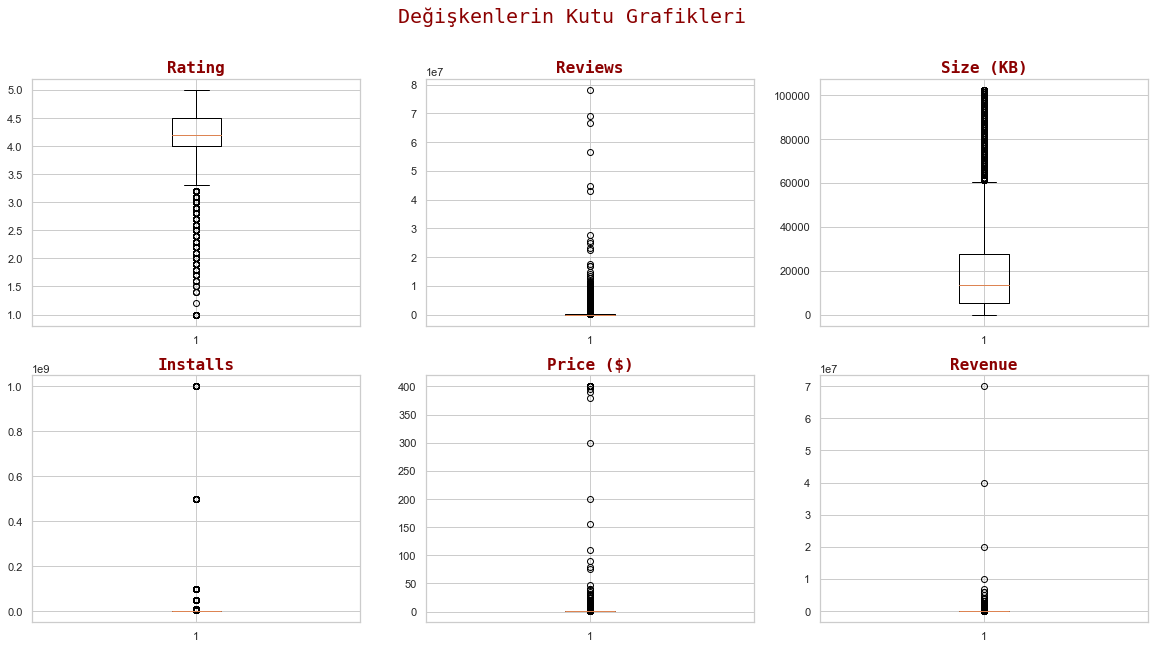

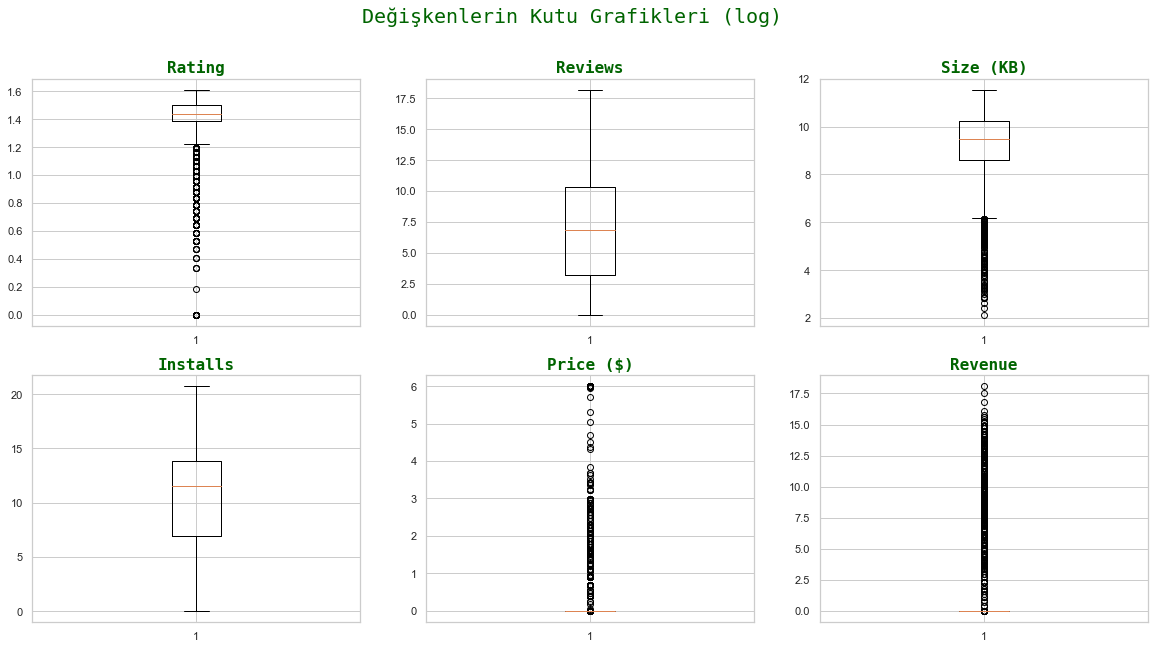

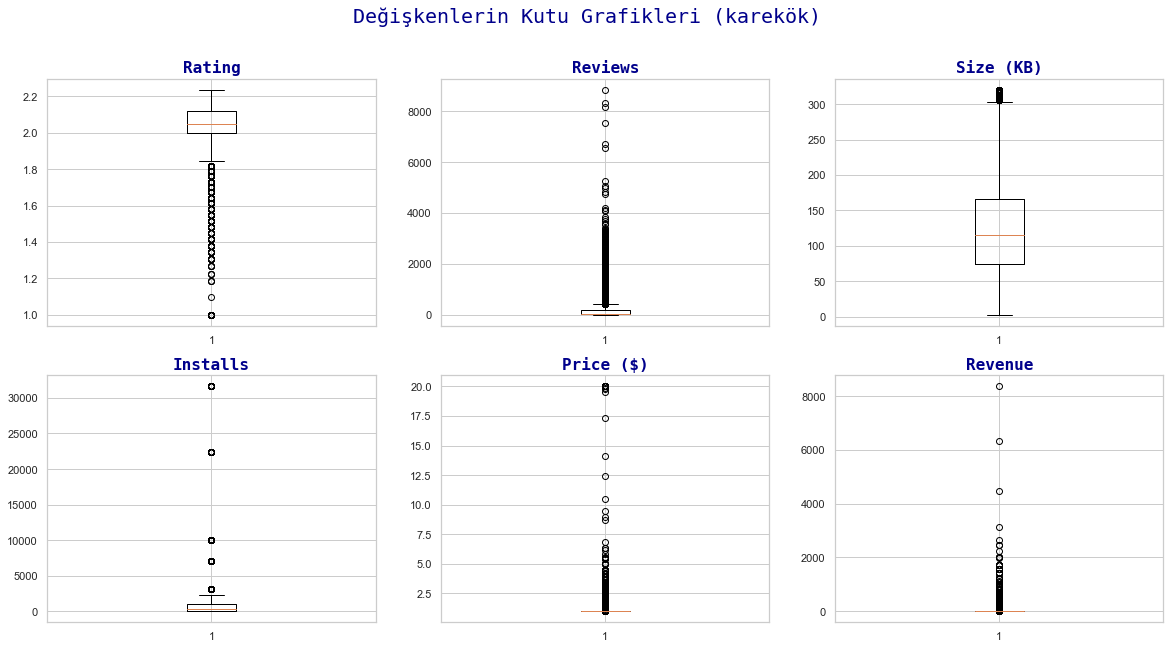

In [51]:
# Değişkenlerimizi kutu grafiğinde göstererek aşırı değerleri gözlemleyelim.
# Orijinal değerler
count = 1
plt.figure(figsize=(20,10))
for degisken in ("Rating", "Reviews", "Size (KB)", "Installs", "Price ($)", "Revenue"):
    plt.subplot(2,3,count)
    plt.boxplot(apps[degisken])
    plt.title("{}".format(degisken), fontdict=title_font)
    count+=1
plt.suptitle("Değişkenlerin Kutu Grafikleri", fontdict=title_font, size=20)

# log dönüşümlü değerler
count = 1
plt.figure(figsize=(20,10))
for degisken in ("Rating", "Reviews", "Size (KB)", "Installs", "Price ($)", "Revenue"):
    plt.subplot(2,3,count)
    plt.boxplot(np.log(apps[degisken]))
    plt.title("{}".format(degisken), fontdict=title_font, color="darkgreen")
    count+=1
plt.suptitle("Değişkenlerin Kutu Grafikleri (log)", fontdict=title_font, size=20, color="darkgreen")

# karekök dönüşümlü değerler
count = 1
plt.figure(figsize=(20,10))
for degisken in ("Rating", "Reviews", "Size (KB)", "Installs", "Price ($)", "Revenue"):
    plt.subplot(2,3,count)
    plt.boxplot(np.sqrt(apps[degisken]))
    plt.title("{}".format(degisken), fontdict=title_font, color="darkblue")
    count+=1
plt.suptitle("Değişkenlerin Kutu Grafikleri (karekök)", fontdict=title_font, size=20, color="darkblue")
plt.show()
del count

Yukarıdaki kutu grafiklerine baktığımızda, bazı değişkenlerde log dönüşümündeki aykırı değerlerin, orijinal veya karekök dönüşümlü değerlerden nispeten daha az olduğunu, yine başka değişkenler için karekök dönüşümün daha avantajlı olduğunu görüyoruz. Dolayısıyla bu dönüşümlerdeki verileri alarak, aykırı değerleri düşük bir miktarda sınırlandırmalı, bunun için winsorize yöntemi uygulamalıyız.<br>Yalnızca "**Price ($)**" değişkenini görsel olarak yorumlamamız zor olduğu için **z-score** değerini kontrol etmemiz gerekiyor. 

In [52]:
# "Price ($)" değişkeni, z-score kontrolü
from scipy.stats import zscore
z_scores = zscore(apps["Price ($)"])    # orijinal veriler
z_scores_log = zscore(np.log(apps["Price ($)"]))    # log dönüşümlü veriler
z_scores_sqrt = zscore(np.sqrt(apps["Price ($)"]))    # karekök dön. veriler

In [53]:
for threshold in range(1,5):
    print(f"Orijinal veri           ve  {threshold}  eşik değeriyle bulunan aşırı değer sayısı:  {len(np.where(z_scores > threshold)[0])}")
    print(f"Log dönüşümlü veri      ve  {threshold}  eşik değeriyle bulunan aşırı değer sayısı:  {len(np.where(z_scores_log > threshold)[0])}")
    print(f"Karekök dönüşümlü veri  ve  {threshold}  eşik değeriyle bulunan aşırı değer sayısı:  {len(np.where(z_scores_sqrt > threshold)[0])}\n")

Orijinal veri           ve  1  eşik değeriyle bulunan aşırı değer sayısı:  47
Log dönüşümlü veri      ve  1  eşik değeriyle bulunan aşırı değer sayısı:  553
Karekök dönüşümlü veri  ve  1  eşik değeriyle bulunan aşırı değer sayısı:  246

Orijinal veri           ve  2  eşik değeriyle bulunan aşırı değer sayısı:  27
Log dönüşümlü veri      ve  2  eşik değeriyle bulunan aşırı değer sayısı:  444
Karekök dönüşümlü veri  ve  2  eşik değeriyle bulunan aşırı değer sayısı:  103

Orijinal veri           ve  3  eşik değeriyle bulunan aşırı değer sayısı:  23
Log dönüşümlü veri      ve  3  eşik değeriyle bulunan aşırı değer sayısı:  245
Karekök dönüşümlü veri  ve  3  eşik değeriyle bulunan aşırı değer sayısı:  62

Orijinal veri           ve  4  eşik değeriyle bulunan aşırı değer sayısı:  23
Log dönüşümlü veri      ve  4  eşik değeriyle bulunan aşırı değer sayısı:  123
Karekök dönüşümlü veri  ve  4  eşik değeriyle bulunan aşırı değer sayısı:  39



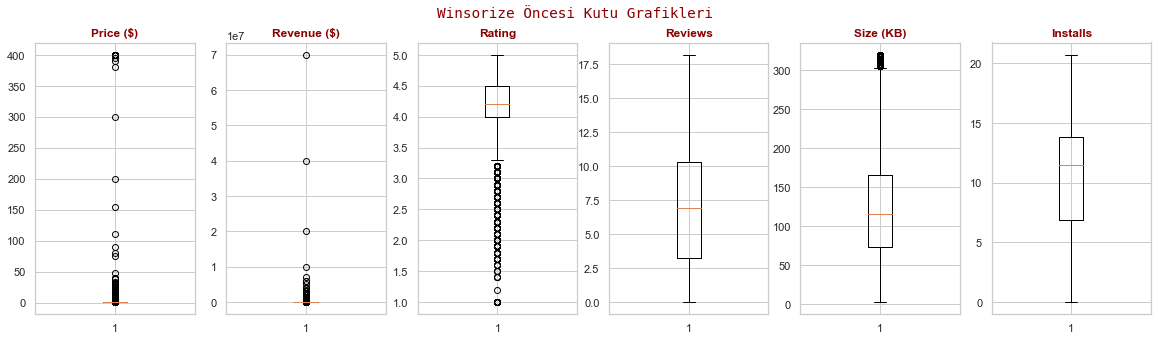

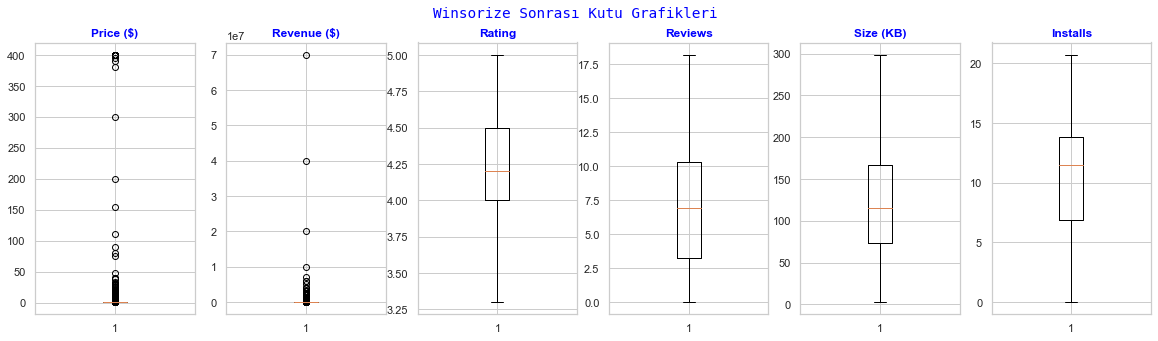

In [67]:
# "Price ($)" değişkenini orijinal haliyle bırakmak daha mantıklı gözüküyor.
# Diğer değişkenleri de, kutu grafiklerini çizerek yorumlayalım.
wo_price = winsorize(apps["Price ($)"], (0, 0), inplace=False)    # wo_: winsorize uygulanmış orijinal veri
wo_revenue = winsorize(apps.Revenue, (0, 0), inplace=False)    # wo_: winsorize uygulanmış orijinal veri
wo_rating = winsorize(apps.Rating, (0.06, 0), inplace=False)    # wo_: winsorize uygulanmış orijinal veri
wl_reviews = winsorize(np.log(apps.Reviews), (0, 0), inplace=False)    # wl_: winsorize ve log dönüşümlü veri
ws_size = winsorize(np.sqrt(apps["Size (KB)"]), (0, 0.02), inplace=False)    # ws_: winsorize ve karekök dönüşümlü veri
wl_installs = winsorize(np.log(apps.Installs), (0, 0), inplace=False)    # wl_: winsorize ve log dönüşümlü veri

plt.figure(figsize=(20,5))
plt.suptitle("Winsorize Öncesi Kutu Grafikleri" ,fontdict=title_font)
j=1
for x,y in ((apps["Price ($)"], "Price ($)"),
            (apps["Revenue"], "Revenue ($)"),
            (apps.Rating, "Rating"),
            (np.log(apps.Reviews), "Reviews"),
            (np.sqrt(apps["Size (KB)"]), "Size (KB)"),
            (np.log(apps.Installs), "Installs")):
    plt.subplot(1,6,j)
    plt.boxplot(x)
    plt.title(y, fontdict=axis_font)
    j+=1
plt.show()

plt.figure(figsize=(20,5))
plt.suptitle("Winsorize Sonrası Kutu Grafikleri" ,fontdict=title_font, color="blue")
j=1
for x,y in ((wo_price, "Price ($)"),
            (wo_revenue, "Revenue ($)"),
            (wo_rating, "Rating"),
            (wl_reviews, "Reviews"),
            (ws_size, "Size (KB)"),
            (wl_installs, "Installs")):
    plt.subplot(1,6,j)
    plt.boxplot(x)
    plt.title(y, fontdict=axis_font, color="blue")
    j+=1
plt.show()
del j

In [68]:
# Veri temizleme kontrollerimizi tamamladığımıza göre orijinal verileri güncelleyelim.
apps["Rating"] = wo_rating
apps["Reviews"] = wl_reviews
apps["Size (KB)"] = ws_size
apps["Installs"] = wl_installs
apps["Price ($)"] = wo_price
apps["Revenue"] = wo_revenue

In [69]:
# Temizlediğimiz .csv dosyasını ayrıca kaydedelim.
# apps.to_csv("/content/drive/My Drive/MertColab/proje1/apps_clean.csv", encoding="utf-8")

## Değişken Analizi
Temizlediğimiz veri setindeki değişkenlerin birbirleriyle olan ilişkilerini ve korelasyonlarını incelemeye başlayalım. İlk önce, paralı uygulamalar üzerine yoğunlaşacağımız için yalnızca "Paralı" tipindeki uygulamaları ayıran bir veri seti oluşturalım.

In [70]:
apps_paid = apps[apps["Type"]=="Paid"]

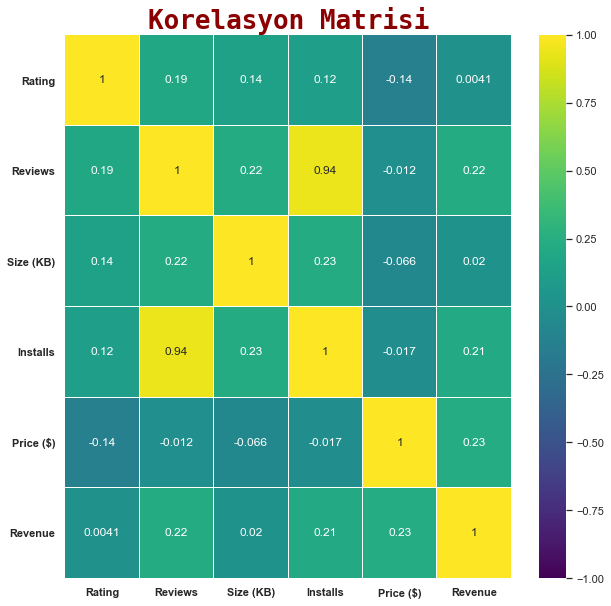

In [75]:
apps_paid_corr = apps_paid.corr()
plt.figure(figsize=(10,10))
sns.heatmap(apps_paid_corr, annot=True, linecolor="white",
            linewidths=0.1, vmin=-1, vmax=1, cmap="viridis")
plt.yticks(rotation=0, weight="bold")
plt.xticks(weight="bold")
plt.title("Korelasyon Matrisi", fontdict = title_font, size=26)
plt.show()

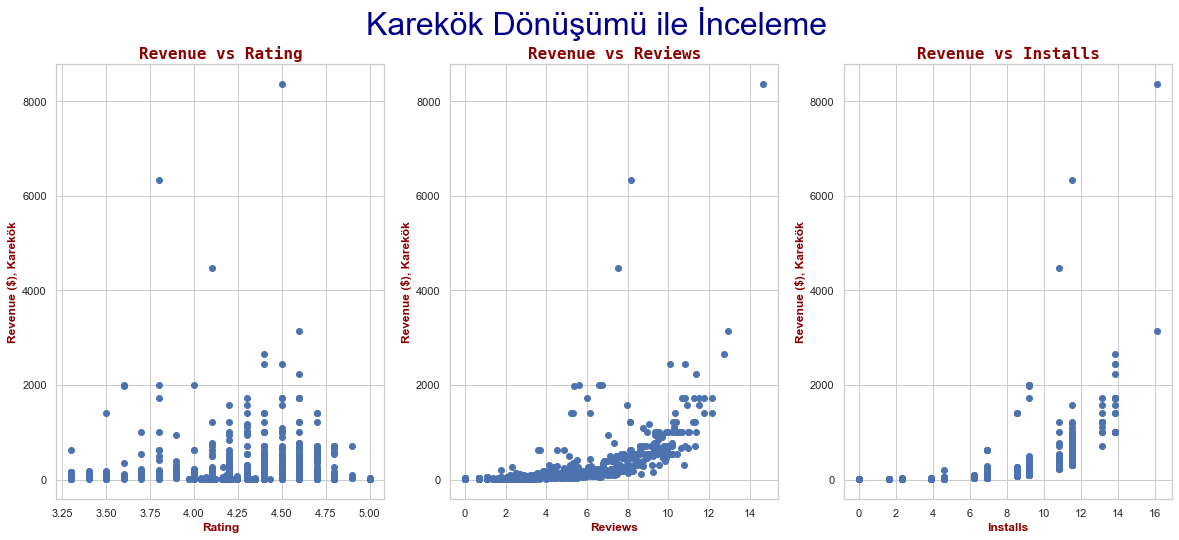

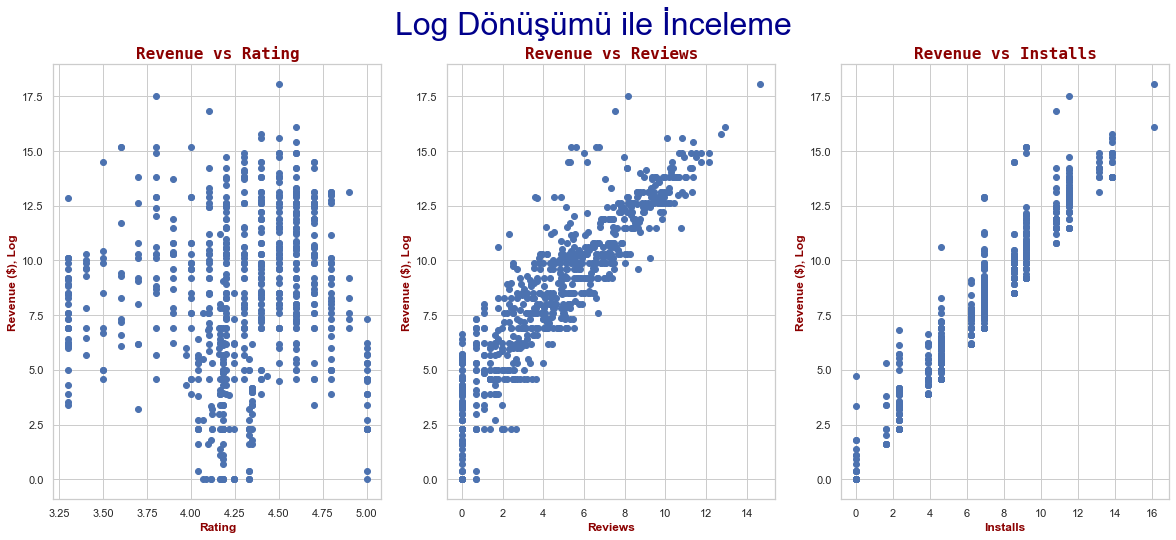

In [77]:
# Hedef değişkenimiz olan "Revenue" ile karşılaştırmak istediğimiz 
# diğer değişkenlerin grafiklerini gözlemleyelim: 
plt.figure(figsize=(20,8))
plt.suptitle("Karekök Dönüşümü ile İnceleme", color="darkblue", size=32)
for i,j in list(enumerate(("Rating", "Reviews", "Installs"))):
    plt.subplot(1,3,i+1)
    plt.scatter(x=apps_paid[j], y=np.sqrt(apps_paid.Revenue))
    plt.title(f"Revenue vs {j}", fontdict=title_font)
    plt.ylabel("Revenue ($), Karekök", fontdict=axis_font)
    plt.xlabel(f"{j}", fontdict=axis_font)

plt.show()

plt.figure(figsize=(20,8))
plt.suptitle("Log Dönüşümü ile İnceleme", color="darkblue", size=32)
for i,j in list(enumerate(("Rating", "Reviews", "Installs"))):
    plt.subplot(1,3,i+1)
    plt.scatter(x=apps_paid[j], y=np.log(apps_paid.Revenue))
    plt.title(f"Revenue vs {j}", fontdict=title_font)
    plt.ylabel("Revenue ($), Log", fontdict=axis_font)
    plt.xlabel(f"{j}", fontdict=axis_font)

plt.show()

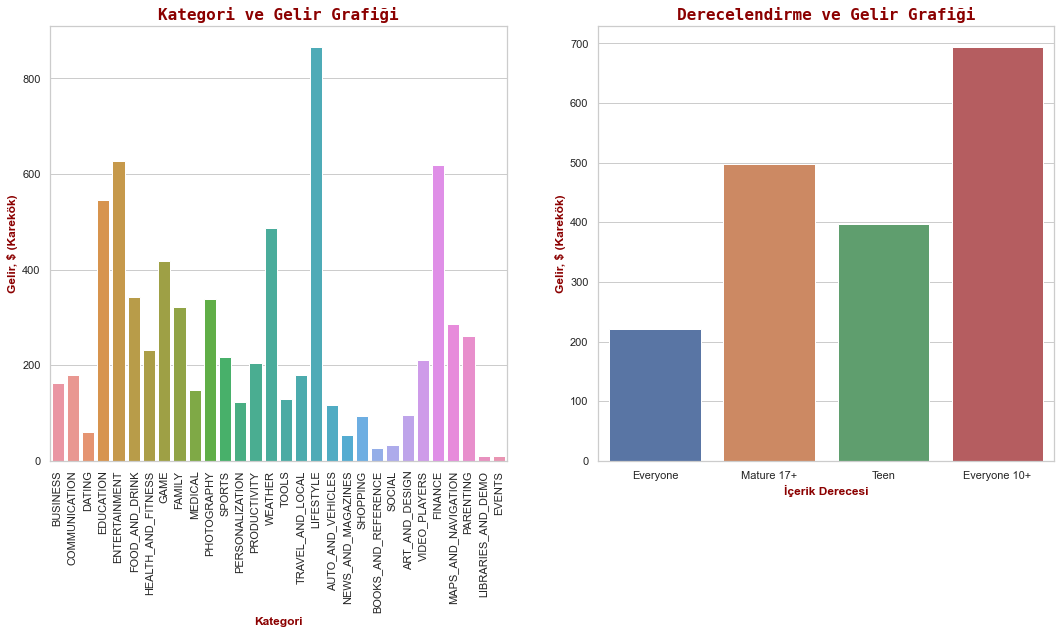

In [78]:
plt.figure(figsize=(18,8))
plt.subplot(1,2,1)
sns.barplot(apps_paid["Category"], np.sqrt(apps_paid.Revenue), ci=None)
plt.xticks(rotation=90)
plt.xlabel("Kategori", fontdict = axis_font)
plt.ylabel("Gelir, $ (Karekök)", fontdict = axis_font)
plt.title("Kategori ve Gelir Grafiği", fontdict = title_font)

plt.subplot(1,2,2)
sns.barplot(apps_paid["Content Rating"], np.sqrt(apps_paid.Revenue), ci = None)
plt.xlabel("İçerik Derecesi", fontdict = axis_font)
plt.ylabel("Gelir, $ (Karekök)", fontdict = axis_font)
plt.title("Derecelendirme ve Gelir Grafiği", fontdict = title_font)

plt.show()
## confidence intervals çok yüksek olduğu için kaldırıldı.

Yukarıdaki grafiklerden şu sonuçları çıkarabiliriz.<br>
En yüksek kazanca sahip içerik derecelendirmesi "**Everyone 10+**" iken yine en kazançlı kategoriler:
1. **LIFESTYLE**
2. **FINANCE**
3. **FAMILY**



## Özellik Mühendisliği


In [79]:
apps_scaled = pd.DataFrame()
apps_scaled["Rating"] = (apps_paid["Rating"])
apps_scaled["Reviews"] = (apps_paid["Reviews"])
apps_scaled["Price"] = (apps_paid["Price ($)"])
#apps_scaled["Revenue"] = scale(apps_paid.Revenue)
apps_scaled.reset_index(drop=True, inplace=True)
    # https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html
apps_scaled

,Rating,Reviews,Price
0,4.700000,9.345046,4.99
1,4.800000,9.239414,4.99
2,4.000000,9.811756,3.99
3,4.200000,7.342779,3.99
4,3.300000,4.043051,6.99
...,...,...,...
751,4.179664,2.833213,0.99
752,4.400000,3.555348,7.99
753,3.800000,5.529429,16.99
754,4.200000,7.247793,1.20


In [80]:
scaler = StandardScaler()
apps_standard = scaler.fit_transform(apps_scaled)

sklearn_pca = PCA(n_components=2)
apps_pca = sklearn_pca.fit_transform(apps_standard)

print(f"Variance ratio of PCA-1: %{sklearn_pca.explained_variance_ratio_[0]*100}")
print(f"Variance ratio of PCA-2: %{sklearn_pca.explained_variance_ratio_[1]*100}")
#print(f"Variance ratio of PCA-3: %{sklearn_pca.explained_variance_ratio_[2]*100}")
print("Variance of PCA-1:", sklearn_pca.explained_variance_[0])
print("Variance of PCA-2:", sklearn_pca.explained_variance_[1])
#print("Variance of PCA-3:", sklearn_pca.explained_variance_[2])

Variance ratio of PCA-1: %41.46426152480963
Variance ratio of PCA-2: %32.94811100644479
Variance of PCA-1: 1.2455754322949433
Variance of PCA-2: 0.9897525266571758


In [94]:
pd.options.display.float_format = "{:.3f}".format

korelasyon = pd.DataFrame()
korelasyon["Revenue"] = apps_paid.Revenue
korelasyon["PCA1"]=pd.DataFrame(apps_pca[:,0])
korelasyon["PCA2"]=pd.DataFrame(apps_pca[:,1])
#korelasyon["PCA3"]=pd.DataFrame(apps_pca)[2]    # diğer türlü gösterim

korelasyon.corr()

,Revenue,PCA1,PCA2
Revenue,1.000,0.188,0.160
PCA1,0.188,1.000,0.263
PCA2,0.160,0.263,1.000


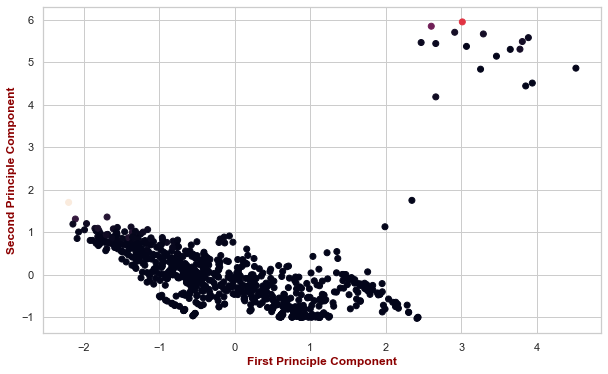

In [100]:
plt.figure(figsize=(10,6))
plt.scatter(apps_pca[:,0], apps_pca[:,1], c = korelasyon["Revenue"])
plt.xlabel("First Principle Component", fontdict=axis_font)
plt.ylabel("Second Principle Component", fontdict=axis_font)
plt.show()

In [101]:
# hedef değişken: Ratings --> Revenue İstem şöyle bir şey olabilir mi:
    # "Paralı uygulamamın 4.5 puan ve üstü puan alması için ücreti ne kadar yapmalıyım?"
    # veya "Maksimum geliri elde etmek için ortalama ne kadar puanlı bir uygulama yapmalıyım?"